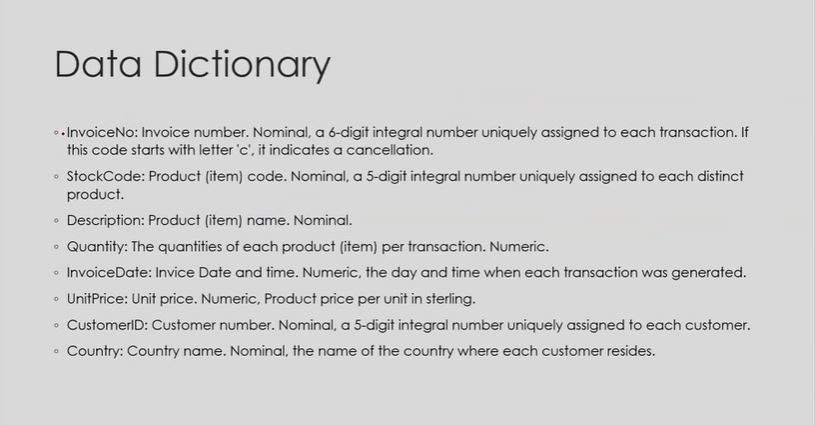

In [36]:
#Basic Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Analysis

In [37]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       NaN     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [38]:
#Checking the basic information of the dataset

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541908 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [39]:
retail.isnull().sum()

InvoiceNo           1
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

***Analyzing the "InvoiceNo"***

In [40]:
retail.loc[retail['InvoiceNo'] == 536365]

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom

In [41]:
#Clearly there are lot of entries for Invoices
#Lets revalidate the point

In [42]:
ret_gr = retail.groupby('InvoiceNo').aggregate({'StockCode': 'count'}).reset_index()
ret_gr.columns = ['InvoiceNo', 'Item Count']
ret_gr

InvoiceNo  Item Count
0        536365           6
1        536366           2
2        536367          12
3        536368           4
4        536369           1
...         ...         ...
25895   C581484           1
25896   C581490           2
25897   C581499           1
25898   C581568           1
25899   C581569           2

[25900 rows x 2 columns]

In [43]:
#Instead invoices we can create a new columns as 'CancellationStatus' with 1, 0
#Then remove InvoiceNo feature

retail['CancellationStatus'] = retail['InvoiceNo'].apply(str).apply(lambda x : 1 if (x[0] == 'C') or (x[0] == 'c') else 0)
retail

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1            NaN     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        CancellationStatus  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
541904                   0  
541905                   0  
541906                   0  
541907                   0  
541908                   0  

[541909 rows x 9 columns]

In [44]:
#Removing Cancellation column

retail_inv = retail.drop('InvoiceNo', axis=1)
retail_inv

StockCode                          Description  Quantity  \
0         85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          71053                  WHITE METAL LANTERN         6   
2         84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...                                  ...       ...   
541904     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France   
541905 2011-12-09 12:50:00       2.10     12680.0          France   
541906 2011-12-09 12:50:00       4.15     12680.0          France   
541907 2011-12-09 12:50:00       4.15     12680.0          France   
541908 2011-12-09 12:50:00       4.95     12680.0          France   

        CancellationStatus  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
541904                   0  
541905                   0  
541906                   0  
541907                   0  
541908                   0  

[541909 rows x 8 columns]

In [46]:
#Now let me check the stockcode

retail_inv['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
20850        1
20863        1
20864        1
47502        1
84968f       1
Name: StockCode, Length: 4070, dtype: int64